In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


# reading data into dataframe
cars_df = pd.read_csv('/content/drive/MyDrive/DataScience/cars93.csv')

# printing top 5 rows
cars_df.head()

,Manufacturer,Model,Type,Price,MPG.city,AirBags,Horsepower,Passengers,Rear.seat.room,Luggage.room
0,Acura,Integra,Small,3259500,25,Driver only,140,5,26.5,11.0
1,Acura,Legend,Midsize,6949500,18,Driver & Passenger,200,5,30.0,15.0
2,Audi,90,Compact,5965500,20,Driver only,172,5,28.0,14.0
3,Audi,100,Midsize,7728500,19,Driver & Passenger,172,6,31.0,17.0
4,BMW,535i,Midsize,6150000,22,Driver only,208,4,27.0,13.0


In [ ]:
sampling_distribution = []
for i in range(10000):
  # generate 50 integers indexes between 0:len(series)
  N = 200
  sample_ind = np.random.randint(0,len(cars_df['MPG.city']), N)

  # extract sample of size 50 using indexes generated in prev step
  sample = cars_df['MPG.city'][sample_ind]
  
  # calculate sample mean
  sample_mean = sample.mean()

  #add sample mean to sampling distribution 
  sampling_distribution.append(sample_mean)

print(sampling_distribution)

[21.99, 21.585, 22.86, 22.245, 22.275, 22.555, 23.025, 22.31, 22.65, 22.27, 21.91, 22.355, 22.27, 22.625, 22.1, 22.47, 22.015, 22.01, 22.145, 22.49, 22.435, 22.25, 22.22, 22.33, 22.53, 22.72, 22.305, 23.205, 22.61, 22.415, 22.065, 22.56, 22.24, 22.115, 22.325, 22.77, 22.48, 22.46, 22.43, 22.765, 22.26, 22.505, 22.84, 22.875, 21.705, 23.06, 22.39, 22.405, 22.035, 22.03, 22.09, 22.425, 22.535, 22.145, 22.74, 22.71, 22.435, 22.26, 22.585, 22.01, 22.21, 22.37, 22.43, 21.965, 22.285, 22.445, 22.575, 22.575, 22.35, 22.575, 22.585, 22.26, 22.095, 22.36, 22.715, 22.62, 21.825, 22.685, 22.65, 21.87, 22.715, 22.835, 22.27, 22.96, 21.85, 22.43, 22.305, 22.29, 21.855, 22.155, 22.74, 22.165, 22.97, 21.9, 22.065, 22.33, 22.0, 21.685, 22.315, 22.02, 21.985, 21.8, 21.87, 22.49, 22.33, 22.825, 22.375, 22.045, 23.025, 21.925, 21.645, 22.445, 22.215, 21.745, 21.96, 22.3, 22.19, 22.63, 21.95, 22.085, 22.8, 23.06, 22.185, 22.31, 22.305, 22.78, 22.16, 22.465, 22.675, 22.315, 22.265, 22.82, 22.295, 22.175, 2

### Normality Tests:
- Lots of ML modeling techniques assume that data is following Gaussian/Normal distribution.

- If methods assuming a Gaussian distribution is used for statistical modeling, and your data is drawn from a different distribution, the findings may be misleading or plain wrong.
- There are a number of techniques that we can use to check and Quantify if a data sample is actuslly following Normal Distribution and to what extent. These tests are called Normality tests. 
- These tests are divided broadly into follwing two categories:
    - Visual Normality Test
    - Statistical Normality Tests

Let's discuss both of categories and apply them on our Cars Dataset:


### Viaual Normality Test:

### Histogram Plot:
- Histogram is a simple and commonly used plot to quickly check the distribution of a sample of data.
- In the histogram, the data is divided into a pre-specified number of groups called bins. 
- The data is then sorted into each bin and the count of the number of observations in each bin is retained.
- The plot shows the bins across the x-axis maintaining their ordinal relationship, and the count/frequency for each bin on the y-axis.
- A sample of data having Normal distribution, shows the familiar bell shape in the histogram plot.

A histogram can be created using the hist() matplotlib function or sns.histplot() as follows:

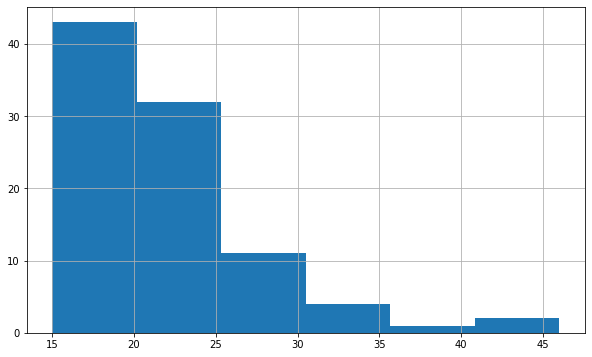

In [ ]:
# Method 1 
cars_df['MPG.city'].hist(figsize = (10,6), bins = 6)	

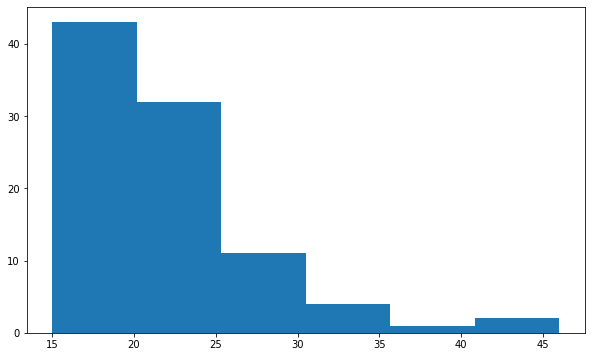

In [ ]:
# Method 2
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))

plt.hist(cars_df['MPG.city'], bins = 6)
plt.show()

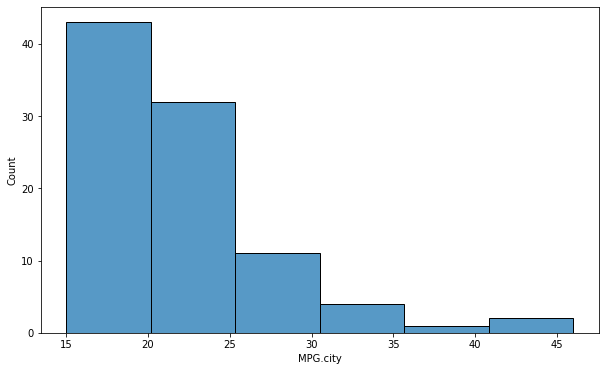

In [ ]:
# Method 3
import seaborn as sns

plt.figure(figsize = (10,6))

sns.histplot( x = 'MPG.city',data = cars_df, bins = 6)
plt.show()

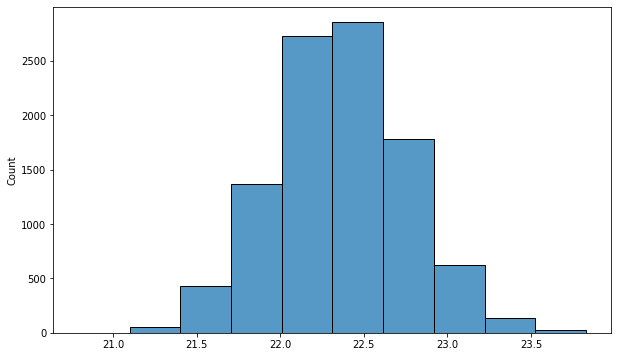

In [ ]:
# Method 3
import seaborn as sns

plt.figure(figsize = (10,6))

sns.histplot( x = sampling_distribution, bins = 10)
plt.show()

### Quantile-Quantile Plot
- Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

- This plot generates its own sample of the idealized distribution that we can use to compare. 
- The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

- The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

- A perfect Normal distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. 
- Deviations by the dots from the line shows a deviation from the expected distribution.
- We can develop a QQ plot in Python using the qqplot() statsmodels function. The function takes the data sample and by default assumes we are comparing it to a Gaussian distribution. 
- We can draw the standardized line by setting the ‘line‘ argument to ‘s‘.

Given below are examples of plotting the test dataset using QQ plot:

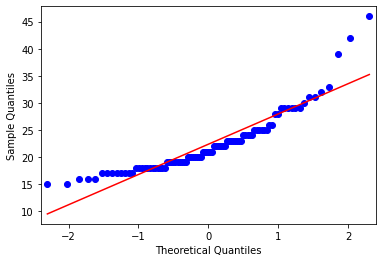

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(cars_df['MPG.city'], line='s')
pyplot.show()

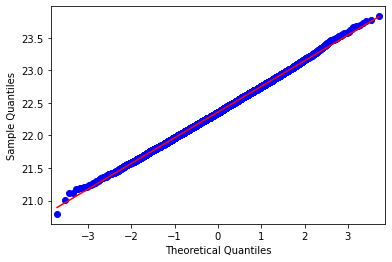

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# q-q plot
qqplot(pd.Series(sampling_distribution), line='s')
pyplot.show()

### Statistical Normality Tests:
- These tests assume that that the sample was drawn from a Normal distribution also called the null hypothesis, or H0. 
- A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

      - p <= alpha: reject H0, not normal.
      - p > alpha: fail to reject H0, normal.

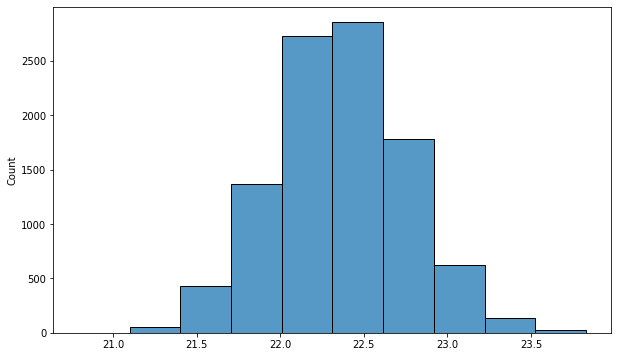

In [ ]:
from numpy.random import seed
from numpy.random import randn

# seed the random number generator
seed(1)
# generate univariate observations
normal_data = 10 * randn(100) + 50


import seaborn as sns

plt.figure(figsize = (10,6))

sns.histplot( x = sampling_distribution, bins = 10)
plt.show()

### Shapiro-Wilk Test
- The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

- In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

- The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-valu

In [ ]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(cars_df['MPG.city'])
print('p-Value = %.3f' % (p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample is following Normal distribution  (fail to reject H0)')
else:
	print('Sample does not appear to follow Normal distribution (reject H0)')

p-Value = 0.000
Sample does not appear to follow Normal distribution (reject H0)


In [ ]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest

# normality test
stat, p = shapiro(normal_data)
print('p-Value = %.3f' % (p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-Value = 0.822
Sample looks Gaussian (fail to reject H0)


### D’Agostino’s K^2 Test
- named after Ralph D’Agostino, the D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution.

- Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.

- Kurtosis quantifies how much of the distribution is in the tail. 

- It is a simple and commonly used statistical test for normality.

- The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value.



In [ ]:
# D'Agostino and Pearson's Test
from scipy.stats import normaltest

# normality test
stat, p = normaltest(normal_data)
print('p-Value = %.3f' % (p))

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-Value = 0.950
Sample looks Gaussian (fail to reject H0)


### Anderson-Darling Test
- Anderson-Darling Test is a statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.


- A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

- The anderson() SciPy function implements the Anderson-Darling test.

The example of calculating the Anderson-Darling test on the sample dataset is listed below.

In [ ]:
# Anderson-Darling Test
from scipy.stats import anderson


# normality test
result = anderson(normal_data)
print('Statistic: %.3f' % result.statistic)


Statistic: 0.220


In [ ]:
result

AndersonResult(statistic=0.21965088555941747, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [ ]:
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.555, data looks normal (fail to reject H0)
10.000: 0.632, data looks normal (fail to reject H0)
5.000: 0.759, data looks normal (fail to reject H0)
2.500: 0.885, data looks normal (fail to reject H0)
1.000: 1.053, data looks normal (fail to reject H0)


- Critical values in a statistical test are a range of pre-defined significance boundaries at which the H0 can be failed to be rejected if the calculated statistic is less than the critical value. 
- Rather than just a single p-value, the test returns a critical value for a range of different commonly used significance levels.

- We can interpret the results by failing to reject the null hypothesis that the data is normal if the calculated test statistic is less than the critical value at a chosen significance level.

## Summary
In this tutorial, we learnt a set of techniques that you can use to evaluate your data sample.

Specifically we learned:
- Graphical methods for qualifying deviations from normal such as histograms and the Q-Q plot.
- Statistical normality tests for quantifying deviations from normal.